### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [2]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('C:/Users/keeni/Desktop/LSE Notes/Course 3 - Advanced Analytics for Organisational Impact/Assignment/turtle_reviews.csv')  

# View the DataFrame.
reviews.head() 

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [3]:
# Any missing values?
reviews.isna().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [4]:
# Explore the data.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [5]:
# Descriptive statistics.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

In [6]:
# Drop unnecessary columns.
reviews = reviews.drop(['language', 'platform'], axis=1)

# View column names.
reviews.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

## 3. Rename columns

In [7]:
# Rename the column headers.
reviews = reviews.rename(columns = {"remuneration (k£)":"remuneration"})
reviews = reviews.rename(columns = {"spending_score (1-100)":"spending_score"})

# View column names.
reviews.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 4. Save the DataFrame as a CSV file

In [8]:
# Create a CSV file as output.
reviews.to_csv('reviews.csv', index=False)

In [9]:
# Import new CSV file with Pandas.
reviews1 = pd.read_csv('C:/Users/keeni/Desktop/LSE Notes/Course 3 - Advanced Analytics for Organisational Impact/Assignment/reviews.csv')  

# View DataFrame.
reviews1.head() 

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [10]:
# To confirm we are not missing any data
reviews1.shape

(2000, 9)

In [11]:
# Check the dataframe
reviews1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


## 5. Linear regression

### 5a) age vs loyalty

In [12]:
# Independent variable.
x1 = reviews1['age'] 

# Dependent variable.
y1 = reviews1['loyalty_points'] 

# OLS model and summary.
# Create formula and pass through OLS methods.
f = 'y1 ~ x1'
test1 = ols(f, data = reviews1).fit()

# Print the regression table.
test1.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Fri, 23 Dec 2022   Prob (F-statistic):             0.0577
Time:                        16:16:55   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x1            -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# Extract the estimated parameters.
print("Parameters: ", test1.params)  

# Extract the standard errors.
print("Standard errors: ", test1.bse)  

# Extract the predicted values.
print("Predicted values: ", test1.predict())  

Parameters:  Intercept    1736.517739
x1             -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x1            2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [14]:
# Set the X coefficient and the constant to generate the regression table.
y1_pred = (1736.517739) + (-4.012805) * reviews1['age']

# View the output.
y1_pred

0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

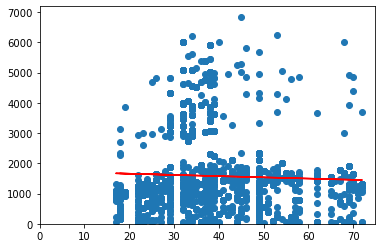

In [15]:
# Plot the graph with a regression line.
# Plot the data points with a scatterplot.
plt.scatter(x1, y1)

# Plot the regression line (in red).
plt.plot(x1, y1_pred, color='red')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

### 5b) renumeration vs loyalty

In [16]:
# Independent variable.
x2 = reviews1['remuneration'] 

# Dependent variable.
y2 = reviews1['loyalty_points']

# OLS model and summary.
# Create formula and pass through OLS methods.
f = 'y2 ~ x2'
test2 = ols(f, data = reviews1).fit()

# Print the regression table.
test2.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y2   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):          2.43e-209
Time:                        16:21:52   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x2            34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# Extract the estimated parameters.
print("Parameters: ", test2.params)  

# Extract the standard errors.
print("Standard errors: ", test2.bse)  

# Extract the predicted values.
print("Predicted values: ", test2.predict()) 

Parameters:  Intercept   -65.686513
x2           34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x2            0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [18]:
# Set the the X coefficient and the constant to generate the regression table.
y2_pred = (-65.686513) + 34.187825 * reviews1['remuneration']

# View the output.
y2_pred

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: remuneration, Length: 2000, dtype: float64

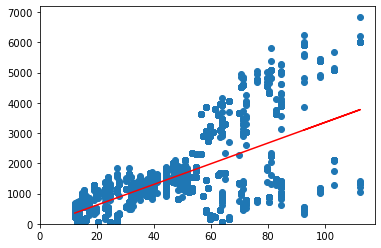

In [19]:
# Plot graph with regression line.
# Plot the data points with a scatterplot.
plt.scatter(x2, y2)

# Plot the regression line (in red).
plt.plot(x2, y2_pred, color='red')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

### 5c) spending vs loyalty

In [20]:
# Independent variable.
x3 = reviews1['spending_score'] 

# Dependent variable.
y3 = reviews1['loyalty_points']

# OLS model and summary.
# Create formula and pass through OLS methods.
f = 'y3 ~ x3'
test3 = ols(f, data = reviews1).fit()

# Print the regression table.
test3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y3   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):          2.92e-263
Time:                        16:24:45   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x3            33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
# Extract the estimated parameters.
print("Parameters: ", test3.params)  

# Extract the standard errors.
print("Standard errors: ", test3.bse)  

# Extract the predicted values.
print("Predicted values: ", test3.predict())  

Parameters:  Intercept   -75.052663
x3           33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x3            0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [22]:
# Set the X coefficient and the constant to generate the regression table.
y3_pred = (-75.052663) + 33.061693 * reviews1['spending_score']

# View the output.
y3_pred

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

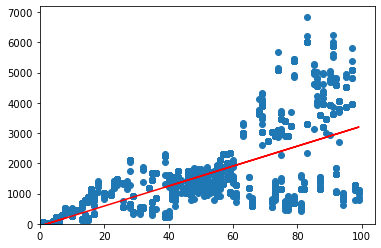

In [23]:
# Plot graph with regression line.
# Plot the data points with a scatterplot.
plt.scatter(x3, y3)

# Plot the regression line (in red).
plt.plot(x3, y3_pred, color='red')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

### Multiple Linear Regression

In [24]:
# Define the dependent variable.
y = reviews1['loyalty_points']  

# Define the independent variables.
X = reviews1[['age', 'remuneration', 'spending_score']] 

In [31]:
# Import the necessary resources 
from sklearn import datasets
from sklearn import linear_model
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Fit the regression model.
mlr = linear_model.LinearRegression()
mlr.fit(X, y) 

LinearRegression()

In [27]:
# Call the predictions for X (array).
mlr.predict(X) 

array([ -252.52008641,  1238.47746341, -1308.43606252, ...,
        4434.8905332 ,  2066.35892261,  1575.56389984])

In [28]:
# Print the R-squared value.
print("R-squared: ", mlr.score(X,y))  

# Print the intercept.
print("Intercept: ", mlr.intercept_) 

# Print the coefficients.
print("Coefficients:")  

# Map a similar index of multiple containers (to be used as a single entity).
list(zip(X, mlr.coef_)) 

R-squared:  0.8399114912748796
Intercept:  -2203.0597513079
Coefficients:


[('age', 11.060658711843358),
 ('remuneration', 34.008385492602486),
 ('spending_score', 34.183196577633645)]

#### Make predictions with the mlr

In [29]:
# Create a variable 'New_age' and define it as 43.
New_age = 43

# Create 'New_remuneration' and define it as 65.
New_remuneration = 65  

# Create 'New_spending_score' and define it as 40.
New_spending_score = 40

# Print the predicted value. 
print ("Predicted Value of loyalty_points: \n", mlr.predict([[New_age ,New_remuneration ,New_spending_score]]))  

Predicted Value of loyalty_points: 
 [1850.42149343]


C:\Users\keeni\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Train and test subsets with (MLR) multiple linear regression

In [32]:
# Split the data in 'train' (80%) and 'test' (20%) sets.
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, y,
                                                                            test_size = 0.20,
                                                                            random_state = 5)

In [33]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(X_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)  

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     2692.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:32:08   Log-Likelihood:                -12227.
No. Observations:                1600   AIC:                         2.446e+04
Df Residuals:                    1596   BIC:                         2.448e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2203.3411     58.253    -37.

### Run a regression test

In [34]:
# Specify the model.
mlr = LinearRegression()  

# Fit the model. We can only fit the model with the training data set.
mlr.fit(X_train, Y_train)  

LinearRegression()

In [35]:
# Call the predictions for X in the train set.
y_pred_mlr = mlr.predict(X_train)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr)) 

Prediction for test set: [ 1362.93474067   767.56846704  2292.11541031 ...  1416.57825601
 -1096.31139624  1531.78396384]


In [36]:
# Call the predictions for X in the test set.
y_pred_mlr = mlr.predict(X_test)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr)) 

Prediction for test set: [ 1.39464002e+03  3.42722127e+03  1.64827702e+03  1.73471263e+03
  8.78436414e+02  1.10385877e+03  3.37583217e+03  1.17368074e+03
  3.24736342e+03  2.23180070e+03 -2.44944699e+02  4.10358129e+02
  2.12783527e+02  9.63165267e+02  1.28320189e+03  1.77257837e+03
 -1.43799603e+02  1.63483668e+03  3.18353398e+03  2.04590612e+03
  1.60641528e+03  2.11803797e+03  1.46031816e+03 -7.21777196e+02
  4.39477305e+03  2.96179966e+03  3.42723600e+03  1.34009235e+03
 -4.44661239e+02  1.33626775e+03  1.41790286e+03  4.58138911e+03
  1.29316633e+03  3.83420234e+03  1.27602323e+03  1.88201997e+03
  5.94541904e+01  4.00594554e+02  2.19418054e+03  6.28463350e+02
  1.50093432e+03  8.28366550e+02  1.08041516e+03  1.63483668e+03
 -8.60817496e+02  1.34238749e+03  1.10249534e+03  1.42146714e+03
 -9.54686183e+02  1.92394653e+03  1.37765359e+03 -8.54393252e+02
  2.97230292e+03  1.65861425e+03 -2.56101162e+02  1.57640549e+03
  1.50963897e+03  1.36293474e+03  1.40406027e+03  3.96782965e+03


In [37]:
# Print the R-squared value.
print(mlr.score(X_test, Y_test)*100)  

85.3050388163067


### Check for multicollinearity

In [39]:
# Import necessary resources
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Add a constant.
x_temp = sm.add_constant(X_train)  

# Create an empty DataFrame. 
vif = pd.DataFrame() 

# Calculate the 'vif' for each value.
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, 
                                               i) for i in range(x_temp.values.shape[1])]  


# Create the feature columns.
vif['features'] = x_temp.columns  

# Print the values to two decimal points.
print(vif.round(2))  

   VIF Factor        features
0       21.29           const
1        1.05             age
2        1.00    remuneration
3        1.06  spending_score


### Evaluate the model

In [40]:
# Call the ‘metrics.mean_absolute_error’ function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(Y_test, Y_pred))  

# Call the ‘metrics.mean_squared_error’ function.
print('Mean Square Error (Final):', metrics.mean_squared_error(Y_test, Y_pred))

Mean Absolute Error (Final): 425.48679627595675
Mean Square Error (Final): 301956.03907853237


### Multiple linear regression after adjusting scale of loyalty points

In [41]:
reviews2 = reviews1.assign(logloyalty=np.log(reviews1['loyalty_points']))

In [42]:
reviews2.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary,logloyalty
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,5.347108
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,6.261492
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",3.688879
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars,6.331502
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap,5.902633


In [43]:
# Define the dependent variable.
y = reviews2['logloyalty']  

# Define the independent variables.
X = reviews2[['age', 'remuneration', 'spending_score']] 

In [44]:
# Fit the regression model.
mlr = linear_model.LinearRegression()
mlr.fit(X, y) 

LinearRegression()

In [45]:
# Call the predictions for X (array).
mlr.predict(X) 

array([5.6036833 , 6.88303351, 4.69883303, ..., 9.16738377, 7.10848149,
       6.71983337])

In [46]:
# Print the R-squared value.
print("R-squared: ", mlr.score(X,y))  

# Print the intercept.
print("Intercept: ", mlr.intercept_) 

# Print the coefficients.
print("Coefficients:")  

# Map a similar index of multiple containers (to be used as a single entity).
list(zip(X, mlr.coef_)) 

R-squared:  0.8164629142894955
Intercept:  3.9913086435691203
Coefficients:


[('age', 0.01023852261968886),
 ('remuneration', 0.0233861129163865),
 ('spending_score', 0.029241847628789792)]

In [47]:
# Split the data in 'train' (80%) and 'test' (20%) sets.
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, y,
                                                                            test_size = 0.20,
                                                                            random_state = 5)

In [48]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(X_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)  

                            OLS Regression Results                            
Dep. Variable:             logloyalty   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     2338.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:37:27   Log-Likelihood:                -897.60
No. Observations:                1600   AIC:                             1803.
Df Residuals:                    1596   BIC:                             1825.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.0124      0.049     81.

In [49]:
# Specify the model.
mlr = LinearRegression()  

# Fit the model. We can only fit the model with the training data set.
mlr.fit(X_train, Y_train)  

LinearRegression()

In [50]:
# Call the predictions for X in the train set.
y_pred_mlr = mlr.predict(X_train)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr)) 

Prediction for test set: [6.72480464 6.29110986 7.44847388 ... 7.02006824 4.90982777 7.03988399]


In [51]:
# Call the predictions for X in the test set.
y_pred_mlr = mlr.predict(X_test)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr)) 

Prediction for test set: [6.91526005 8.518279   7.07027355 7.14626234 6.55130074 6.64472741
 8.34289581 6.82596617 8.34260665 7.65732719 5.56746443 5.94357635
 5.98742424 6.51089872 6.802745   7.2531149  5.65226022 7.05628957
 8.2483809  7.4843897  7.02102408 7.62017827 7.06075941 5.21902744
 9.16232912 8.05337504 8.48836304 6.82919486 5.48614664 6.76184885
 6.84956067 9.32660003 6.65794445 8.74530915 6.77545561 7.22101385
 5.88549163 5.90359589 7.6684478  6.12049757 6.89689428 6.43945237
 6.63124946 7.05628957 5.087211   6.81366063 6.67094046 6.82884946
 5.05433528 7.30905916 6.93773808 5.13733213 8.10043972 7.00824494
 5.61352894 7.02254219 6.96139714 6.72480464 6.81263666 8.84656317
 8.7189997  7.2285925  7.22059618 6.67100472 6.82430733 6.71448311
 7.20731902 6.52071422 6.29110986 6.78098571 7.36301529 5.86478042
 8.84656317 8.49692134 7.34019187 6.85945233 5.68106772 8.52494166
 7.24183334 6.64472741 7.60884109 5.85571609 8.25501144 6.55130074
 6.43945237 6.00756515 6.36754012 6.4

In [52]:
# Print the R-squared value.
print(mlr.score(X_test, Y_test)*100)  

82.09825200912873


In [54]:
# Call the ‘metrics.mean_absolute_error’ function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(Y_test, Y_pred))  

# Call the ‘metrics.mean_squared_error’ function.
print('Mean Square Error (Final):', metrics.mean_squared_error(Y_test, Y_pred))  

Mean Absolute Error (Final): 0.3574212981997779
Mean Square Error (Final): 0.23683546257320023


## 6. Observations and insights

***Your observations here...***






The linear models are not very strong when simple, the strongest out of the 3 models being loyelty points vs spending scores that has an R-squared of 0.452.
I tried then to build and apply a multiple linear model, and it is much stronger with an R-squared of 0.835 and an Adj R-squared of 0.835. 
The VIF is very low, so the indipendent variables are uncorrelated.
The MAE, though, is high at 425.4. This is likely due to the scale of the loyalty points that has a different order from the indipendent variables. 
I adjusted the scale making the log of the loyalty ploints and reapplied the multi linear regression model. Thar resulted in an almost unchanged R-squared, of 0.815 and an Adj R-squared of 0.84.  The MAE in that case has become low, 0.357.

That means that the MLR model is the strongest within the models built to explain the variation of the loyalty points based on the variation of age, remuneration, spending scores.

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [59]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the CSV file(s) as df2.
# load the csv file and create a dataframe
reviews1 = pd.read_csv('C:/Users/keeni/Desktop/LSE Notes/Course 3 - Advanced Analytics for Organisational Impact/Assignment/reviews.csv')  

# View DataFrame.
reviews1.head() 

In [55]:
# Drop unnecessary columns.
df2 = reviews1[['remuneration', 'spending_score']]

# View DataFrame.
df2.head() 

,remuneration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


In [56]:
# Explore the data.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [57]:
# Descriptive statistics.
df2.describe()

,remuneration,spending_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


## 2. Plot

<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

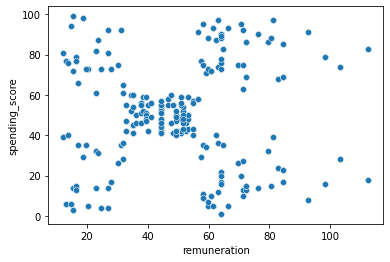

In [62]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='remuneration',
                y='spending_score',
                data=df2)

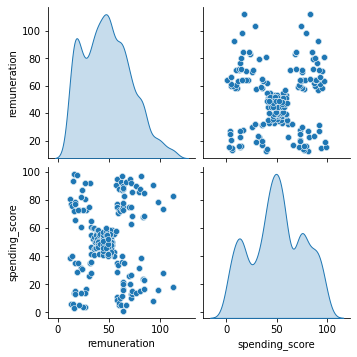

In [63]:
# Create a pairplot with Seaborn.
x = df2[['remuneration', 'spending_score']]

sns.pairplot(df2,
             vars=x,
             diag_kind= 'kde')

## 3. Elbow and silhoutte methods

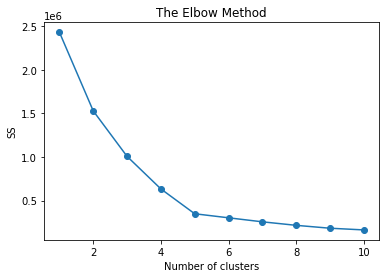

In [64]:
# Determine the number of clusters: Elbow method.
# Import the KMeans class.
from sklearn.cluster import KMeans 

# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++', 
                    max_iter = 500,
                    n_init = 10,
                    random_state = 42)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS")

plt.show()

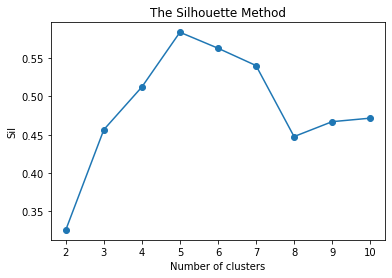

In [65]:
# Determine the number of clusters: Silhouette method.
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

## 4. Evaluate k-means model at different values of *k*

#### 3 Clusters

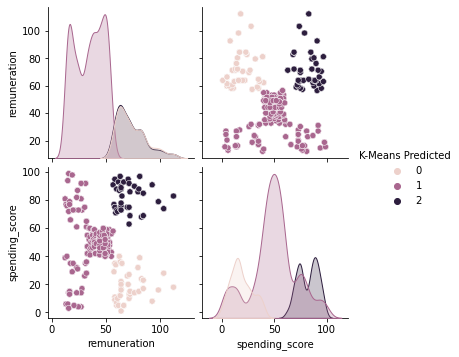

In [66]:
# Use 3 clusters:
kmeans = KMeans(n_clusters = 3,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [67]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

1    1293
2     356
0     351
Name: K-Means Predicted, dtype: int64

#### 5 clusters

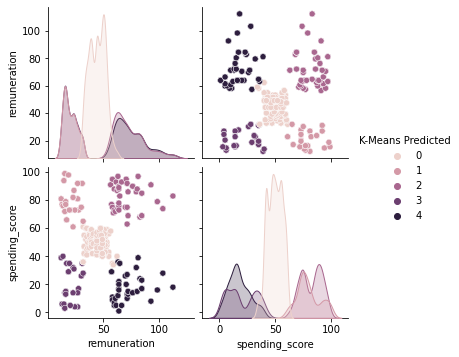

In [68]:
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [69]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
2    356
4    330
3    271
1    269
Name: K-Means Predicted, dtype: int64

#### 7 clusters

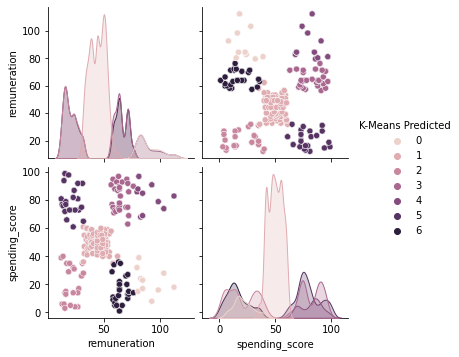

In [70]:
# Use 7 clusters:
kmeans = KMeans(n_clusters = 7,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [71]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

1    767
2    271
5    269
3    238
6    214
0    123
4    118
Name: K-Means Predicted, dtype: int64

## 5. Fit final model and justify your choice

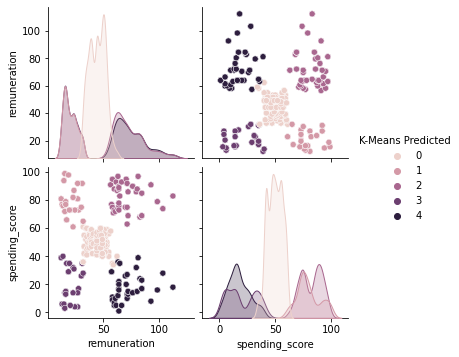

In [72]:
# Apply the final model.
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [73]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
2    356
4    330
3    271
1    269
Name: K-Means Predicted, dtype: int64

## 6. Plot and interpret the clusters

<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

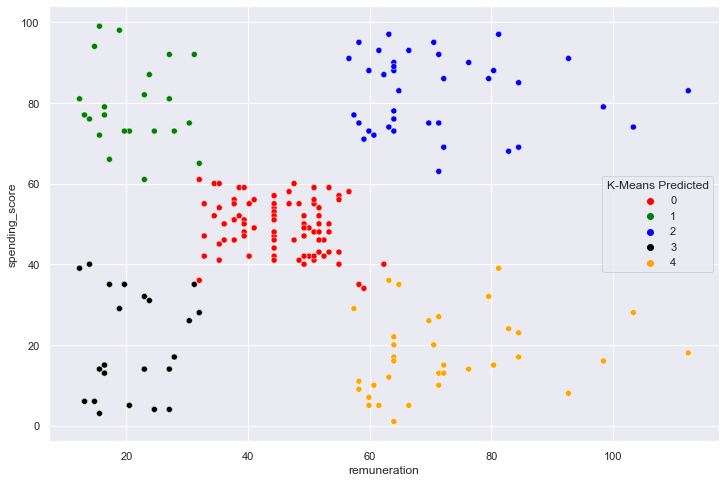

In [74]:
# Visualising the clusters.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=x ,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])

## 7. Discuss: Insights and observations

***Your observations here...***

Each point on the scatterplot represents a customer and the color shows to which cluster it belongs. The clusters are well formed. With this visualisation , we can describe the clusters as follows:

- Cluster 0 — Customer with medium remuneration and medium spending score
- Cluster 1 — Customer with low remuneration and with high spending score.
- Cluster 2 — Customer with high remuneration and with high spending score.
- Cluster 3 — Customer with low remuneration and with low spending score.
- Cluster 4 — Customer with high remuneration and with low spending score.
Customers belonging to groups 1 and 2 are the most engaged with games, customers belonging to group 0 are moderately engaged, customers belonging to groups 3 and 4 are low engaged with games.

Turtle games can also use this information to develop marketing strategies: as example, propose customers of group 1 with campaigns to grow loyalty scores and achieve fidelity benefits with sales offers in order to keep a stable spending even with low remineration, or we can propose to customers belonging to group 4 some try before buying offers to try to convert them into more engaged groups.

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [91]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

nltk.download ('punkt')
nltk.download ('stopwords')

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\keeni\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\keeni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [76]:
# Load the data set as df3.
df3 = reviews1[['review', 'summary']]

# View DataFrame.
df3.head() 

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [77]:
# Explore data set.
df3.shape

(2000, 2)

In [78]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   2000 non-null   object
 1   summary  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [79]:
# Determine if there are any missing values.
df3.isna().sum()

review     0
summary    0
dtype: int64

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [80]:
# Review: Change all to lower case and join with a space.
df3['review'] = df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [81]:
# Summary: Change all to lower case and join with a space.
df3['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [82]:
# Replace all the punctuations in review column.
df3['review'] = df3['review'].str.replace('[^\w\s]','')

# View output.
df3['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [83]:
# Replace all the puncuations in summary column.
df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

# View output.
df3['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [84]:
# Check the number of duplicate values in the review column.
df3.review.duplicated().sum()

50

In [85]:
# Drop duplicates in the review column.
df4 = df3.drop_duplicates(subset=['review'])

# View DataFrame.
df4.reset_index(inplace=True)
df4.head()

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


In [86]:
# Check the DataFrame.
df4.shape

(1950, 3)

In [87]:
# Check the number of duplicate values in the review column.
df3.summary.duplicated().sum()

649

In [88]:
# Drop duplicates in the review column.
df4 = df3.drop_duplicates(subset=['summary'])

# Preview data.
df4.reset_index(inplace=True)
df4.head()

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


In [89]:
# Check the DataFrame.
df4.shape

(1351, 3)

## 3. Tokenise and create wordclouds

In [92]:
# Apply tokenisation to both columns.
df4['review_tokens'] = df4['review'].apply(word_tokenize)

df4['summary_tokens'] = df4['summary'].apply(word_tokenize)

# View DataFrame.
df4.head()

,index,review,summary,review_tokens,summary_tokens
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"


In [93]:
# Check the DataFrame.
df4.shape

(1351, 5)

In [94]:
# Review: Create a word cloud.
# Define an empty list of tokens for review.
rev_tokens = []

for i in range(df4.shape[0]):
    # Add each token to the list.
    rev_tokens = rev_tokens + df4['review_tokens'][i]

In [95]:
# Generate a DataFrame from Counter for review most common words.
rev_counts = pd.DataFrame(Counter(rev_tokens).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
rev_counts

,Frequency
Word,
the,5021
and,2934
to,2843
a,2830
of,2262
i,1888
it,1830
is,1594
this,1551


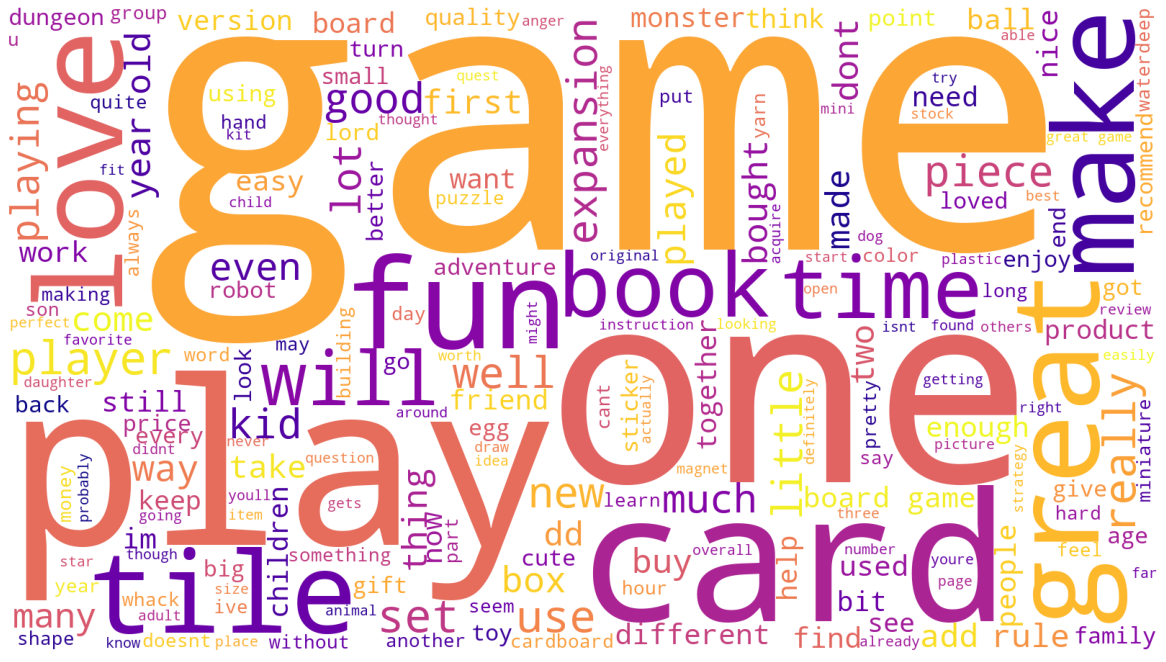

In [98]:
# Review: Plot the WordCloud image.
# Define an empty string variable for Review.
rev_tokens_string = ''

for value in rev_tokens:
    # Add each filtered token word to the string.
    rev_tokens_string = rev_tokens_string + value + ' '

# Create a WordCloud for Review.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(rev_tokens_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [96]:
# Summary: Create a word cloud.
sum_tokens = []

for i in range(df4.shape[0]):
    # Add each token to the list.
    sum_tokens = sum_tokens + df4['summary_tokens'][i]

In [97]:
# Generate a DataFrame from Counter for summary most common words.
sum_counts = pd.DataFrame(Counter(sum_tokens).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
sum_counts

,Frequency
Word,
game,268
the,258
a,238
great,237
for,229
to,192
fun,175
and,168
it,139


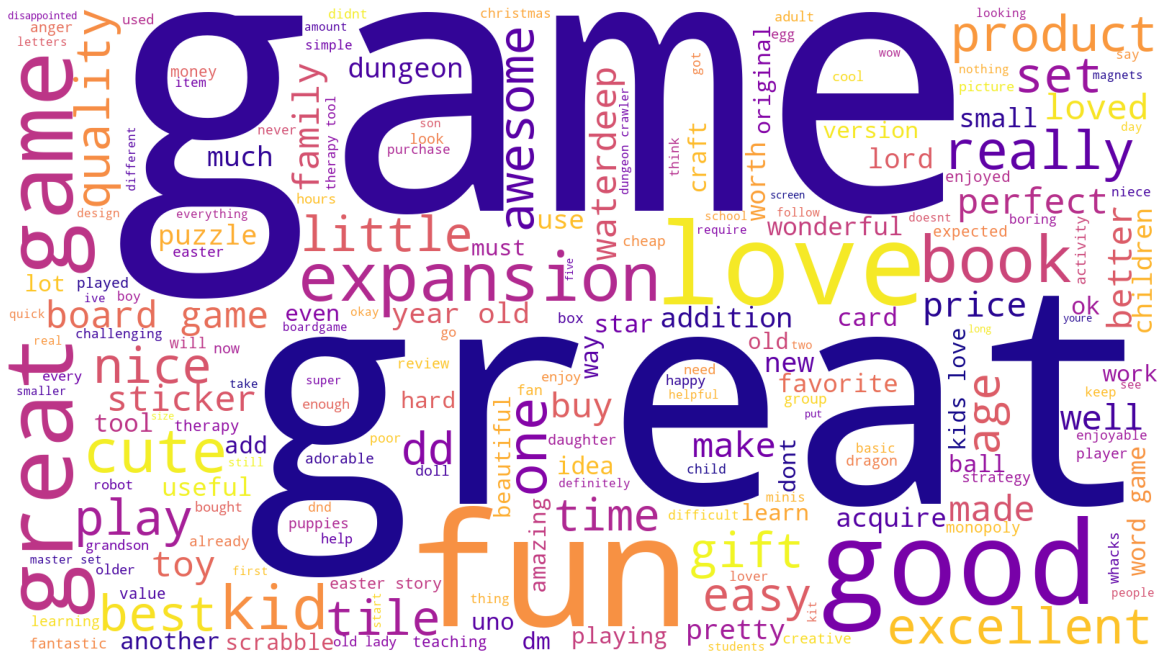

In [99]:
# Summary: Plot the WordCloud image.
# Define an empty string variable for Summary.
sum_tokens_string = ''

for value in sum_tokens:
    # Add each filtered token word to the string.
    sum_tokens_string = sum_tokens_string + value + ' '

# Create a WordCloud for Summary.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(sum_tokens_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [100]:
# Calculate the frequency distribution for review.
rev_fdist = FreqDist(rev_tokens)

# Preview data.
rev_fdist

FreqDist({'the': 5021, 'and': 2934, 'to': 2843, 'a': 2830, 'of': 2262, 'i': 1888, 'it': 1830, 'is': 1594, 'this': 1551, 'for': 1361, ...})

In [101]:
# Calculate the frequency distribution for summary.
sum_fdist = FreqDist(sum_tokens)

# Preview data.
sum_fdist

FreqDist({'game': 268, 'the': 258, 'a': 238, 'great': 237, 'for': 229, 'to': 192, 'fun': 175, 'and': 168, 'it': 139, 'of': 131, ...})

### 4b) Remove alphanumeric characters and stopwords

In [102]:
### Review
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
tokens1 = [word for word in rev_tokens if word.isalnum()]

# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words.
tokens2 = [x for x in tokens1 if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens2_string = ''

for value in tokens1:
    # Add each filtered token word to the string.
    tokens2_string = tokens2_string + value + ' '

In [103]:
### Summary
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
tokens3 = [word for word in sum_tokens if word.isalnum()]

# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words.
tokens4 = [x for x in tokens3 if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens4_string = ''

for value in tokens3:
    # Add each filtered token word to the string.
    tokens4_string = tokens4_string + value + ' '

### 4c) Create wordcloud without stopwords

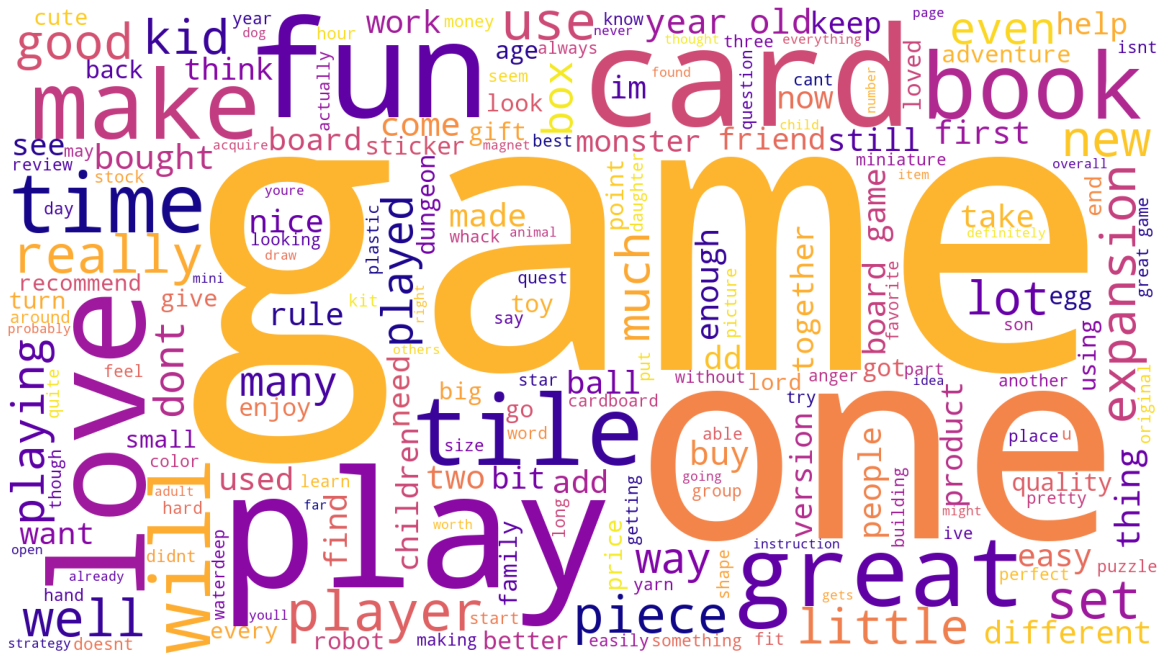

In [104]:
### Review
# Create a WordCloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

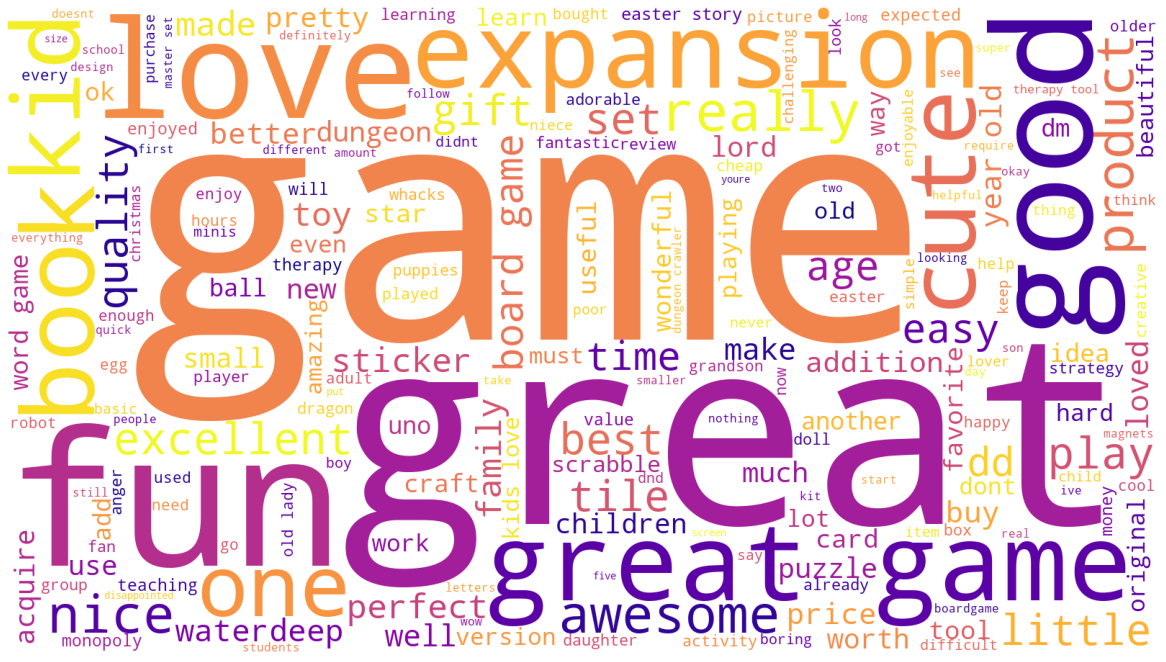

In [105]:
### Summary
# Create a WordCloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens4_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

### 4d) Identify 15 most common words and polarity

In [106]:
### Review

# Generate a DataFrame from Counter.
rev_counts = pd.DataFrame(Counter(tokens2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
rev_counts

,Frequency
Word,
game,1360
one,475
play,442
fun,407
great,392
like,373
get,293
cards,281
tiles,280


In [107]:
### Summary

# Generate a DataFrame from Counter.
sum_counts = pd.DataFrame(Counter(tokens4).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
sum_counts

,Frequency
Word,
game,268
great,237
fun,175
good,84
love,70
like,54
kids,48
book,42
expansion,42


## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [108]:
### Review

def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

# Populate a new column with polarity scores for each comment.
df4['rev_polarity'] = df4['review'].apply(generate_polarity)

# Preview the result.
df4['rev_polarity'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: rev_polarity, dtype: float64

In [109]:
### Review

# Define a function to extract a subjectivity score for the comment.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

# Populate a new column with subjectivity scores for each comment.
df4['rev_subjectivity'] = df4['review'].apply(generate_subjectivity)

# Preview the result.
df4['rev_subjectivity'].head()

0    0.486111
1    0.442976
2    0.430435
3    0.784848
4    0.316667
Name: rev_subjectivity, dtype: float64

In [110]:
### Summary

def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

# Populate a new column with polarity scores for each comment.
df4['sum_polarity'] = df4['summary'].apply(generate_polarity)

# Preview the result.
df4['sum_polarity'].head()

0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: sum_polarity, dtype: float64

In [111]:
### Summary

# Define a function to extract a subjectivity score for the comment.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

# Populate a new column with subjectivity scores for each comment.
df4['sum_subjectivity'] = df4['summary'].apply(generate_subjectivity)

# Preview the result.
df4['sum_subjectivity'].head()

0    0.500000
1    0.900000
2    0.733333
3    0.000000
4    0.000000
Name: sum_subjectivity, dtype: float64

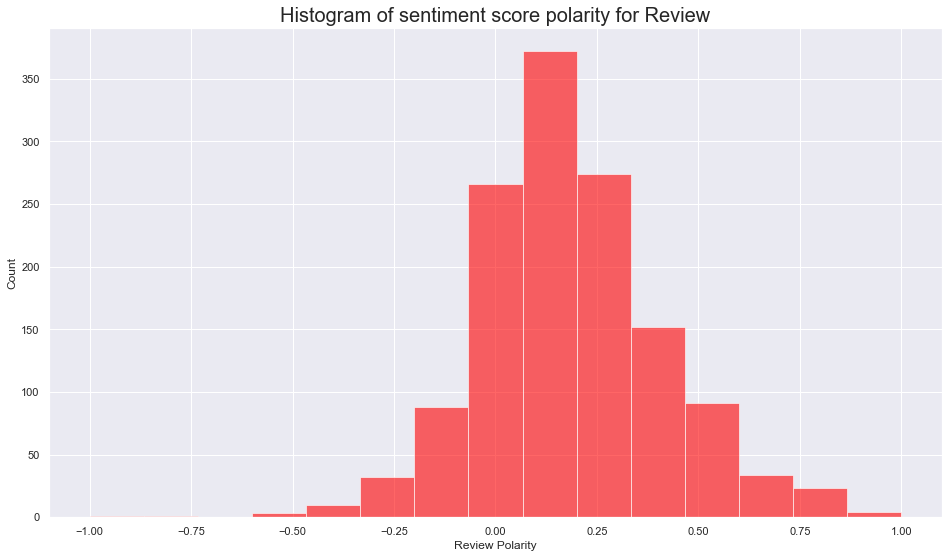

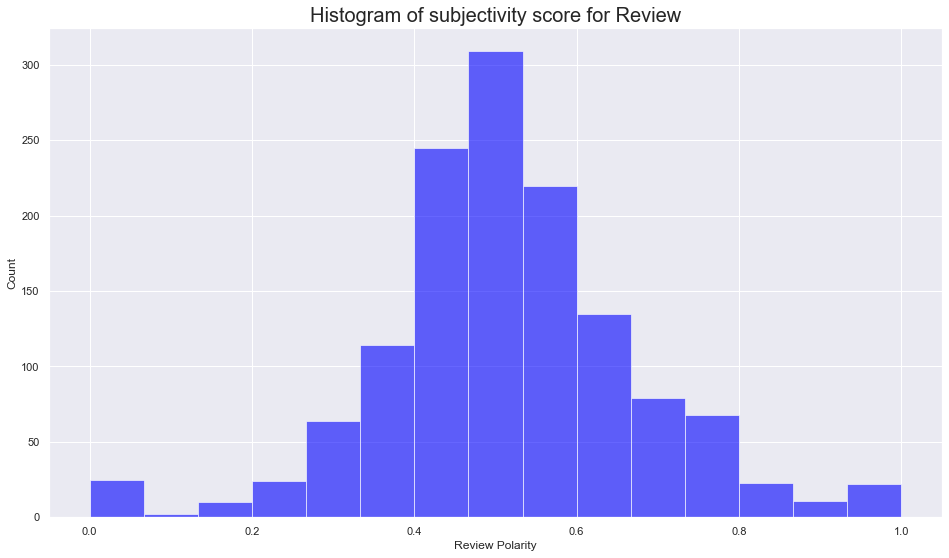

In [113]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
### Review

# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df4['rev_polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Review Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity for Review', fontsize=20)

plt.show()

# Histogram of sentiment score
### Review

# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df4['rev_subjectivity'], num_bins, facecolor='blue', alpha=0.6)

# Set the labels.
plt.xlabel('Review Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of subjectivity score for Review', fontsize=20)

plt.show()

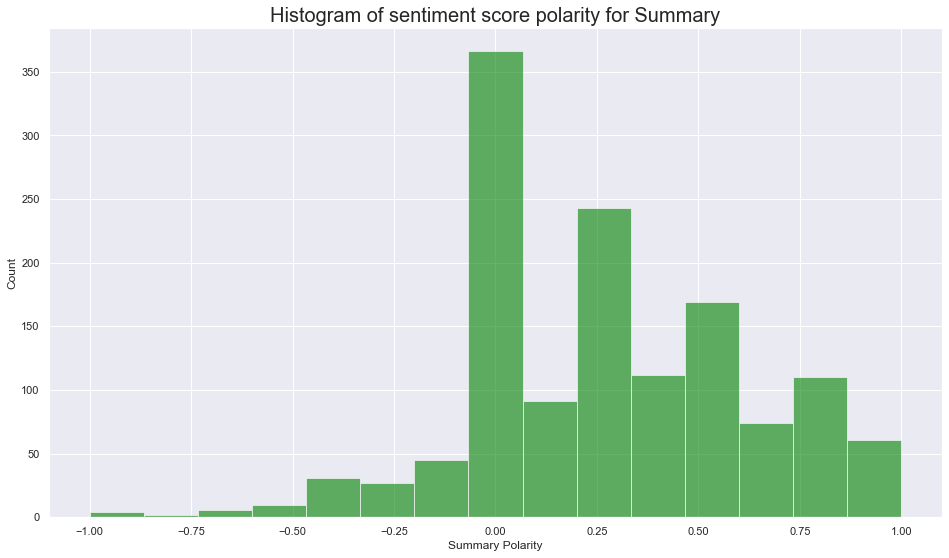

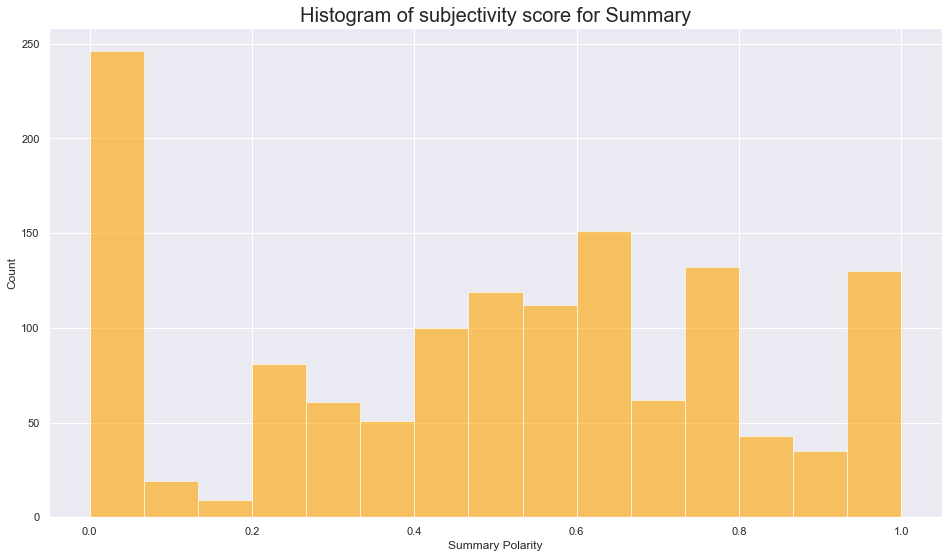

In [114]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity
### Summary

# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df4['sum_polarity'], num_bins, facecolor='green', alpha=0.6)

# Set the labels.
plt.xlabel('Summary Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity for Summary', fontsize=20)

plt.show()

# Histogram of sentiment score
### Summary

# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df4['sum_subjectivity'], num_bins, facecolor='orange', alpha=0.6)

# Set the labels.
plt.xlabel('Summary Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of subjectivity score for Summary', fontsize=20)

plt.show()

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [117]:
# Top 20 negative reviews.
# Create a DataFrame.
negative_sentiment = df4.nsmallest(20, 'rev_polarity')

# Eliminate unnecessary columns.
negative_sentiment = negative_sentiment[['review']]

# Eliminate unnecessary columns.
negative_sentiment.style.set_properties(subset=['review'], **{'width': '600px'})

,review
165,booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not
147,incomplete kit very disappointing
267,one of my staff will be using this game soon so i dont know how well it works as yet but after looking at the cards i believe it will be helpful in getting a conversation started regarding anger and what to do to control it
90,i bought this as a christmas gift for my grandson its a sticker book so how can i go wrong with this gift
141,i sent this product to my granddaughter the pompom maker comes in two parts and is supposed to snap together to create the pompoms however both parts were the same making it unusable if you cant make the pompoms the kit is useless since this was sent as a gift i do not have it to return very disappointed
251,my 8 yearold granddaughter and i were very frustrated and discouraged attempting this craft it is definitely not for a young child i too had difficulty understanding the directions we were very disappointed
382,i purchased this on the recommendation of two therapists working with my adopted children the children found it boring and put it down half way through
312,this game although it appears to be like uno and have an easier play method it was still too time consuming and wordy for my children with learning disabilities
355,my son loves playing this game it was recommended by a counselor at school that works with him
714,if you like me used to play dd but now you and your friends growed up and cant be together because all the responsibilities and bla bla bla this game is for you come to the dungeon


In [118]:
# Top 20 negative summaries.
# Create a DataFrame.
negative_sentiment = df4.nsmallest(20, 'sum_polarity')

# Eliminate unnecessary columns.
negative_sentiment = negative_sentiment[['summary']]

# Eliminate unnecessary columns.
negative_sentiment.style.set_properties(subset=['summary'], **{'width': '600px'})

,summary
17,the worst value ive ever seen
165,boring unless you are a craft person which i am
588,boring
838,before this i hated running any rpg campaign dealing with towns because it
1,another worthless dungeon masters screen from galeforce9
116,disappointed
266,promotes anger instead of teaching calming methods
635,too bad this is not what i was expecting
638,bad qualityall made of paper
144,at age 31 i found these very difficult to make


In [115]:
# Top 20 positive reviews.
# Create a DataFrame.
positive_sentiment = df4.nlargest(20, 'rev_polarity')

# Eliminate unnecessary columns.
positive_sentiment = positive_sentiment[['review']]

# Adjust the column width.
positive_sentiment.style.set_properties(subset=['review'], **{'width': '600px'})

,review
564,perfect
1082,my daughter loves her stickers awesome seller thank you
1336,perfect for tutoring my grandson in spelling
891,the best part i see is the box what a wonderfully diverse and rounded set for the cost i am so happy and as the dm you know that if i am happy my players are happy
498,great quality very cute and perfect for my toddler
31,the pictures are great ive done one and gave it to a friend of mine who likes dragons
336,great seller happy with my purchase 5 starrrr
439,great easter gift for kids
491,these are great
575,great


In [116]:
# Top 20 positive summaries.
# Create a DataFrame.
positive_sentiment = df4.nlargest(20, 'sum_polarity')

# Eliminate unnecessary columns.
positive_sentiment = positive_sentiment[['summary']]

# Adjust the column width.
positive_sentiment.style.set_properties(subset=['summary'], **{'width': '600px'})

,summary
5,best gm screen ever
23,wonderful designs
27,perfect
61,theyre the perfect size to keep in the car or a diaper
107,perfect for preschooler
112,awesome sticker activity for the price
132,awesome book
133,he was very happy with his gift
150,awesome
166,awesome and welldesigned for 9 year olds


## 7. Discuss: Insights and observations

***Your observations here...***

Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information. Subjectivity is also a float which lies in the range of [0,1].
For Reviews we can see the polarity distribution is centered on a positive value and is slightly skewed towards the positive, meaning the sentiment toward games are mostly positive. Looking at the subjectivity, we can see that it centers around a value of 0.5 and is slightly skewed on the right, meaning that it is halfway between personal opinion and factual information.
For Summary, we can see that the polarity skewness towards the positive value is higher, and looking at the subjectivity distribution, we see a huge spike at 0 but also some less prominent spikes above 0.5. That shows still a positive sentiment that is more based on personal opinion.

Having a look at the reviews and summary, we see in the positive ones many related to the reaction when gifted to relatives, or to the way they keep kids entertained and teach them, or to additional gifts included in the package like stickers.
The negative reviews and summary, there are many comments related to some games being too complicated compared to the age of the users, some too boring, some complaints against quality. 

# 